In [16]:
import des_queue
import simpy as sip
import numpy as np
from collections import deque
import pandas as pd
import os
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
# # name = 'servers_'
# mu, lamd = 1, 99/100
# # print(f"rho = {lamd/(1/mu)}")
# DES.run_simu(name, sip.Resource, mu, lamd, 1000)
# res_dict, cutoffs = DES.waiting_times('servers_normal_1000')

In [18]:
max_iter = 5000
n = 1
mu = 1
lamd = 1/0.8
a = np.random.exponential
b = np.random.exponential
queue_type = sip.Resource
f_name = 'testing_sign_11'

path = f"logged_data/{f_name}.csv"
print(f"Rho is {1/lamd/mu}.")

Rho is 0.8.


In [19]:
def gen_waiting_time(n,max_iter, mu, lamd , a, b, queue_type,f_name):
    des_queue.main_des(max_iter, n, (1/n)*mu , lamd, a, b, queue_type,f_name)
    my_df = pd.read_csv(f"logged_data/{f_name}.csv")
    n2_waiting_time = my_df["entry_time"] - my_df["start_request_time"]
    if(os.path.exists(path) and os.path.isfile(path)):
        os.remove(path)
    return n2_waiting_time
n= 1
res = gen_waiting_time(n,max_iter, mu, lamd , a, b, queue_type,f_name)
res

DES finished.


0       0.000000
1       0.000000
2       0.132967
3       0.000000
4       0.000000
          ...   
3974    9.040016
3975    7.619455
3976    8.069957
3977    8.754000
3978    9.314387
Length: 3979, dtype: float64

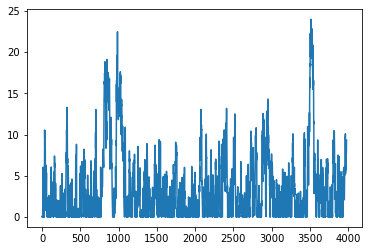

In [20]:
plt.plot(res)

In [21]:
# n 1 only for now
all_rhos = np.arange(0.1,1,0.1)
all_rhos

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

------

In [22]:

def write_signif(comparison, rho, low_idx_sign, alpha, name):
    """Log the current data to the file with the experiment.
     If the file does not exist, make file and add header row.
     :return void
     """

    if not os.path.exists('signif_data'):
        os.makedirs("signif_data")

    # if file does not exist yet make one and write the column headers in it
    my_file = Path(os.path.join("signif_data", name + ".csv"))

    if not my_file.is_file():
        with open(os.path.join("signif_data", name + ".csv"), "w+") as f:
            wr = csv.writer(f)
            wr.writerow(["comparison", "rho", "low_idx_sign", "alpha"])

    # log the data
    with open(os.path.join("signif_data", name + ".csv"), "a") as f:

        wr = csv.writer(f)
        wr.writerow([comparison, rho, low_idx_sign, alpha])
    return None


# def find_lowest_sign_bs(col1, col2, alpha):
#     """
#     Binary search for lowest significant index.
#     :param col1:
#     :param col2:
#     :param alpha:
#     :return: lowest index that is significant
#     """
#     n_iters = len(col1)
#     high = n_iters
#     low = 0
#     last_signif_idx = n_iters
#     while low <= high:
#
#         mid = low + (high - low) // 2
#         print(low, mid, high)
#         if not is_significant(mid, col1, col2, 0.05) and mid in [low,high]:
#             print('Found', low,mid,high)
#             return mid
#
#         # if not significant yet move up left boundary
#         elif not is_significant(mid, col1, col2, 0.05):
#             low = mid + 1
#         # if is significant, move down right boundary
#         else:
#             last_signif_idx = mid
#             high = mid - 1
#     print("NOT FOUND WTF")
#
#
#     return 0

def find_lowest_sign(col1,col2,alpha):
    right = len(col1)-1
    while is_significant(right, col1, col2, alpha):
        right -= 1
    return right +1


from scipy.stats import ttest_ind


def is_significant(idx, col1, col2, alpha):


    if ttest_ind(col1[:idx], col2[:idx])[1] < alpha:
        return True
    else:
        return False

In [23]:
sign_df = pd.DataFrame(columns=["Comparison", "Rho", 'Low_idx_sign'])

# all_rhos = np.arange(0.1,1,0.1)
all_rhos = np.arange(0,1,0.05)[1:]

max_iter = 5000
alpha = 0.05
name = "test"
# for comparison of n [1vs2,1vs4,2vs4]:
for comp_tuple in zip([1,1,2],[2,4,4]):
    for rho in all_rhos:
        # do simulation here
        wt_1 = gen_waiting_time(comp_tuple[0],max_iter, mu, lamd
                                , a, b, queue_type,f_name)[1000:]
        wt_2 = gen_waiting_time(comp_tuple[1],max_iter, mu, lamd
                                , a, b, queue_type,f_name)[1000:]
        while not is_significant(-1,wt_1,wt_2, alpha):
            max_iter *= 2
            print(f"Ttest with all samples is not significant for rho {rho}, and comparing {comp_tuple}. Doubling the iterations to {max_iter}")
            wt_1 = gen_waiting_time(comp_tuple[0],max_iter, mu, lamd
                                    , a, b, queue_type,f_name)[1000:]
            wt_2 = gen_waiting_time(comp_tuple[1],max_iter, mu, lamd
                                    , a, b, queue_type,f_name)[1000:]

        else:
            low_idx =find_lowest_sign(wt_1,wt_2,alpha)
            write_signif(comp_tuple,rho,low_idx, alpha, name)

DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES finished.
DES fi

In [24]:
res = pd.read_csv(f'signif_data/{name}.csv')
res

,comparison,rho,low_idx_sign,alpha
0,"(1, 2)",0.05,2,0.05
1,"(1, 2)",0.10,16,0.05
2,"(1, 2)",0.15,2,0.05
3,"(1, 2)",0.20,8,0.05
4,"(1, 2)",0.25,2,0.05
5,"(1, 2)",0.30,7,0.05
6,"(1, 2)",0.35,2,0.05
7,"(1, 2)",0.40,2,0.05
8,"(1, 2)",0.45,4,0.05
9,"(1, 2)",0.50,6,0.05


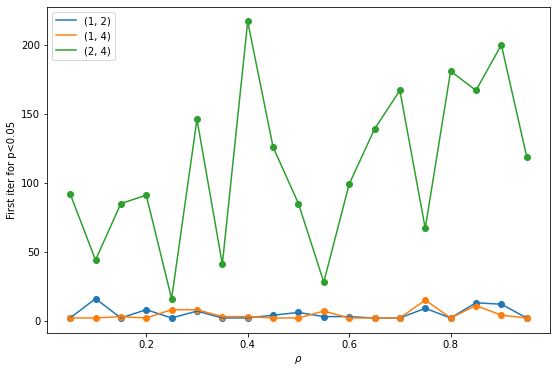

In [37]:
plt.figure(figsize=(9,6))
print()
for comp in set(res['comparison']):
    cur_comp = res[res['comparison']==comp]
    plt.plot(cur_comp['rho'], cur_comp['low_idx_sign'], label = comp)
    plt.scatter(cur_comp['rho'], cur_comp['low_idx_sign'])
plt.legend()
plt.xlabel(fr"$\rho$")
plt.ylabel("First iter for p<0.05")
plt.show()
